In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [21]:
plt.style.use(style='seaborn')

df=pd.read_csv('archive/all-data.csv',encoding = "ISO-8859-1")
df.head()

/tmp/ipykernel_7748/1636991860.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style='seaborn')


,Sentiments,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [22]:
df['Sentiments'].value_counts()

Sentiments
neutral     2879
positive    1363
negative     604
Name: count, dtype: int64

In [23]:
x=df['News Headline'].values
y=df["Sentiments"].values

In [24]:
print(f"{x.shape}")
print(f"{y.shape}")

(4846,)
(4846,)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

In [26]:
df1=pd.DataFrame(x_train).rename(columns={0:'news'})
df2=pd.DataFrame(y_train).rename(columns={0:"sentiment"})
df_train=pd.concat([df1,df2],axis=1)

In [27]:
df_train.head()

,news,sentiment
0,Around 250 of these reductions will be impleme...,neutral
1,The acquisition is part of Ramirent 's strateg...,positive
2,EPS from continuing operations came in at 0.30...,positive
3,Price talk is in the Euribor plus 2 bps area a...,neutral
4,The pine oil project is related to the upgrade...,neutral


In [28]:
df3=pd.DataFrame(x_test).rename(columns={0:'news'})
df4=pd.DataFrame(y_test).rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

In [29]:
df_test.head()

,news,sentiment
0,"Kai Tulonen , Chief Technology Officer , SysOp...",positive
1,Danske Bank is Denmark 's largest bank with 3....,neutral
2,"Furthermore , sales of new passenger cars and ...",negative
3,"Profit before taxes was EUR 5.4 mn , up from E...",positive
4,The new location is n't the only change Wellmo...,neutral


In [30]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
def remove_punctuation(text):
    if type(text)==float:
        return text
    ans=""
    for ch in text:
        if ch not in string.punctuation:
            ans+=ch

    return ans

In [33]:
df_train["news"]=df_train["news"].apply(lambda x: remove_punctuation(x))
df_test["news"]=df_test["news"].apply(lambda x: remove_punctuation(x))

In [34]:
df_train.head()

,news,sentiment
0,Around 250 of these reductions will be impleme...,neutral
1,The acquisition is part of Ramirent s strategy...,positive
2,EPS from continuing operations came in at 030 ...,positive
3,Price talk is in the Euribor plus 2 bps area a...,neutral
4,The pine oil project is related to the upgrade...,neutral


In [35]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/zishan-
[nltk_data]     pc/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [50]:
def generate_N_grams(text, ngram=1):
    words = [
        word for word in text.split(" ") if word not in set(stopwords.words("english"))
    ]
    # print("Sentence after removing stopwords:", words)
    temp = zip(*[words[i:] for i in range(0, ngram)])
    ans = [" ".join(ngram) for ngram in temp]
    return ans

In [63]:
generate_N_grams("The sun rises in the east",1)

['The', 'sun', 'rises', 'east']

In [52]:
from collections import defaultdict
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)

In [53]:
for text in df_train[df_train.sentiment=="positive"].news:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

In [54]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

In [55]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

In [56]:
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [57]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [58]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [59]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

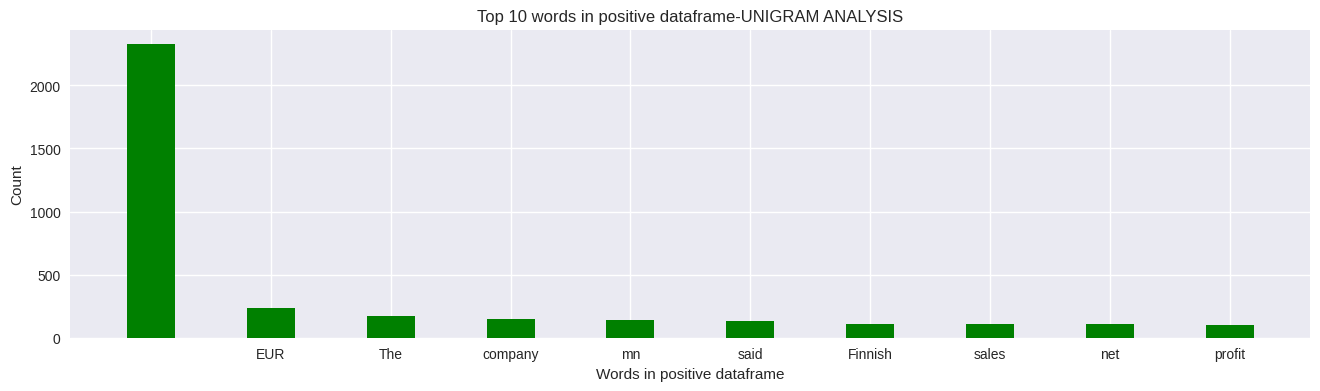

In [60]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

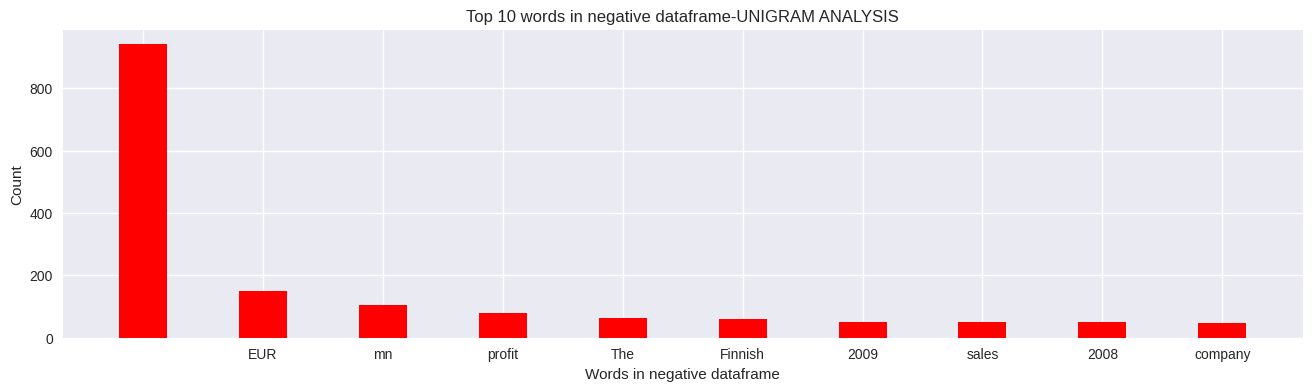

In [61]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

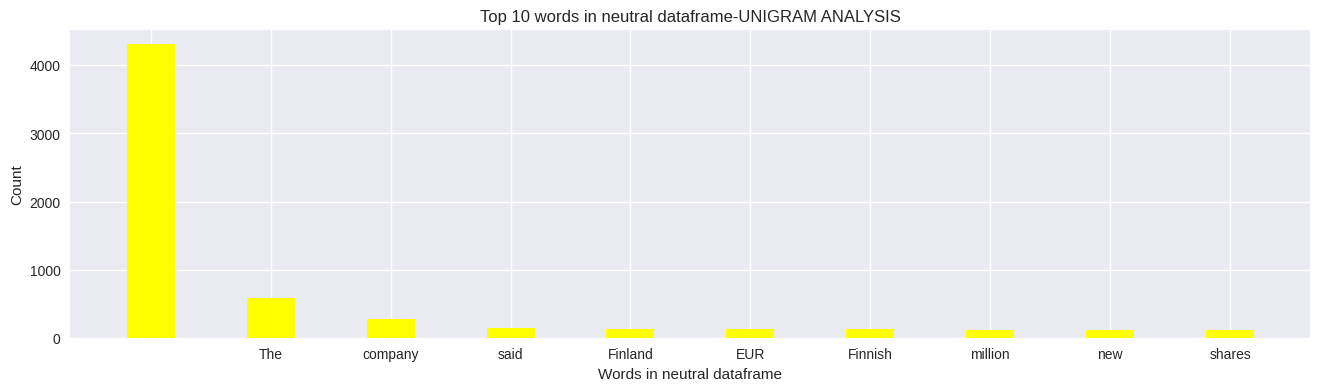

In [62]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()